# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ryo Richie]
- **Email:** [ryorichie@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- At which kind of weather condition Bike Sharing rentaling most bike daily and hourly ?
- At which kind of season people renting bike the most ?
- At which hour and kind of days people renting bike the most ?

## Import Semua Packages/Library yang Digunakan

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import library pandas untuk dataset dan matplotlib serta seaborn untuk visualisasi data

## Data Wrangling

### Gathering Data

In [203]:
hourly_df = pd.read_csv('hour.csv')
daily_df = pd.read_csv('day.csv')


Melakukan import untuk kedua dataset

In [204]:
composite_df = pd.merge(
    daily_df,
    hourly_df,
    how='left',
    on=['dteday','season','yr','mnth','holiday','weekday','workingday']
)
composite_df

,instant_x,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit_x,temp_x,...,instant_y,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,2,1,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,3,2,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,4,3,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,5,4,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,17375,19,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,17376,20,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,17377,21,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,17378,22,1,0.26,0.2727,0.56,0.1343,13,48,61


Melakukan Gathering Data dan Merge untuk kedua dataset, namun karena kedua data set mempunyai value yang sama dengan tempo waktu yang berbeda, data tersebut nanti harus dilabeli untuk hourly atau daily

Merapikan composite_df

### Assessing Data

In [205]:
composite_df.isnull().sum()

instant_x       0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
hr              0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

Tidak ada yang null, maka null test lolos

In [206]:
composite_df.duplicated().sum()

0

Tidak ada yang duplicated, maka duplicated test lolos

In [207]:
composite_df.describe()

,instant_x,season,yr,mnth,holiday,weekday,workingday,weathersit_x,temp_x,atemp_x,...,instant_y,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,8690.0000,11.546752,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,5017.0295,6.914405,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,1.0000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,4345.5000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,8690.0000,12.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,13034.5000,18.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,17379.0000,23.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tampak tidak ada innacurate value

In [208]:
composite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season        17379 non-null  int64  
 3   yr            17379 non-null  int64  
 4   mnth          17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   weekday       17379 non-null  int64  
 7   workingday    17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  hr            17379 non-null  int64  
 18  weathersit_y  17379 non-nu

dteday bukan date time, harus diubah menjadi date time

### Cleaning Data

In [209]:
composite_df.dteday = pd.to_datetime(composite_df.dteday)
composite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   yr            17379 non-null  int64         
 4   mnth          17379 non-null  int64         
 5   holiday       17379 non-null  int64         
 6   weekday       17379 non-null  int64         
 7   workingday    17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

Mengubah dteday menjadi date time

In [210]:
composite_df.rename(columns={
        'dteday': 'date',
        'yr': 'year',
        'mnth': 'month',
        'weathersit_x': 'daily_weather',
        'weathersit_y': 'hourly_weather',
        'temp_x': 'daily_temperature',
        'atemp_x': 'daily_feeling_temperature',
        'hum_x': 'daily_humidity',
        'windspeed_x': 'daily_windspeed',
        'casual_x': 'daily_casuals',
        'registered_x': 'daily_registered',
        'cnt_x': 'total_daily_users',
        'hr': 'hour',
        'temp_y': 'hourly_temperature',
        'atemp_y': 'hourly_feeling_temperature',
        'hum_y': 'hourly_humidity',
        'windspeed_y': 'hourly_windspeed',
        'casual_y': 'hourly_casuals',
        'registered_y': 'hourly_registered',
        'cnt_y': 'total_hourly_users', 
}, inplace=True)
composite_df.drop(['instant_x', 'instant_y'], axis=1, inplace=True)

composite_df.info()
composite_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        17379 non-null  datetime64[ns]
 1   season                      17379 non-null  int64         
 2   year                        17379 non-null  int64         
 3   month                       17379 non-null  int64         
 4   holiday                     17379 non-null  int64         
 5   weekday                     17379 non-null  int64         
 6   workingday                  17379 non-null  int64         
 7   daily_weather               17379 non-null  int64         
 8   daily_temperature           17379 non-null  float64       
 9   daily_feeling_temperature   17379 non-null  float64       
 10  daily_humidity              17379 non-null  float64       
 11  daily_windspeed             17379 non-null  float64   

,date,season,year,month,holiday,weekday,workingday,daily_weather,daily_temperature,daily_feeling_temperature,...,total_daily_users,hour,hourly_weather,hourly_temperature,hourly_feeling_temperature,hourly_humidity,hourly_windspeed,hourly_casuals,hourly_registered,total_hourly_users
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,4533.692963,11.546752,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,22.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,3214.000000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,4563.000000,12.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5986.000000,18.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,8714.000000,23.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,1917.376947,6.914405,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Rename nama column agar dataframe tampak lebih rapi
dan delete instant_y dan instant_x

## Exploratory Data Analysis (EDA)

### Explore Weather Daily Rent Usage Depend on Weather

In [211]:
daily_usage_by_weather = composite_df.groupby("daily_weather").total_daily_users.mean().sort_values(ascending=False).reset_index()
conditions = {
    'Clear': daily_usage_by_weather['daily_weather'] == 1,
    'Cloudy': daily_usage_by_weather['daily_weather'] == 2,
    'Light Rain': daily_usage_by_weather['daily_weather'] == 3,
    'Heavy Rain': daily_usage_by_weather['daily_weather'] == 4,
}

daily_usage_by_weather['daily_weather'] = np.select(conditions.values(), conditions.keys(), default=daily_usage_by_weather['daily_weather'])
daily_usage_by_weather.rename(columns={
        'total_daily_users': 'average daily usage',
        'daily_weather': 'daily weather',
}, inplace=True)
daily_usage_by_weather

,daily weather,average daily usage
0,Clear,4895.177083
1,Cloudy,4062.717595
2,Light Rain,1914.700855


Berikut Adalah Index Dari Weather Sit  
1: Clear/Few Cloud  
2: Mist + Cloudy/Mist  
3: Light Rain/Snow  
Berarti banyak orang yang merental sepeda di hari yang cerah   
mean() digunakan karena jumlah hari cuara cerah tidak sama dengan jumlah hari cuaca buruk

### Explore Weather Hourly Rent Usage Depend on Weather

In [212]:
hourly_usage_by_weather = composite_df.groupby("hourly_weather").total_hourly_users.mean().sort_values(ascending=False).reset_index()
conditions = {
    'Clear': hourly_usage_by_weather['hourly_weather'] == 1,
    'Cloudy': hourly_usage_by_weather['hourly_weather'] == 2,
    'Light Rain': hourly_usage_by_weather['hourly_weather'] == 3,
    'Heavy Rain': hourly_usage_by_weather['hourly_weather'] == 4,
}

hourly_usage_by_weather['hourly_weather'] = np.select(conditions.values(), conditions.keys(), default=hourly_usage_by_weather['hourly_weather'])
hourly_usage_by_weather.rename(columns={
        'total_hourly_users': 'average hourly usage',
        'hourly_weather': 'hourly weather',
}, inplace=True)
hourly_usage_by_weather

,hourly weather,average hourly usage
0,Clear,204.869272
1,Cloudy,175.165493
2,Light Rain,111.579281
3,Heavy Rain,74.333333


Berikut Adalah Index Dari Weather Sit  
1: Clear/Few Cloud  
2: Mist + Cloudy/Mist  
3: Light Rain/Snow  
4: Heavy Rain/Snow  
Berarti banyak orang yang merental sepeda di hari yang cerah  
mean() digunakan karena jumlah jam cuara cerah tidak sama dengan jumlah hari cuaca buruk  

### Explore Which Season People Renting Bike The Most?

In [213]:
seasonly_usage = composite_df.groupby("season").total_daily_users.mean().sort_values(ascending=False).reset_index()
conditions = {
    'Spring': seasonly_usage['season'] == 1,
    'Summer': seasonly_usage['season'] == 2,
    'Fall': seasonly_usage['season'] == 3,
    'Winter': seasonly_usage['season'] == 4,
}
seasonly_usage.rename(columns={
        'total_daily_users': 'average usage'
}, inplace=True)
seasonly_usage['season'] = np.select(conditions.values(), conditions.keys(), default=seasonly_usage['season'])
seasonly_usage

,season,average usage
0,Fall,5654.093194
1,Summer,4995.253119
2,Winter,4765.366021
3,Spring,2635.348185


1:spring, 2:summer, 3:fall, 4:winter  
People Mostly Rent Bike at Fall and Summer  
mean() hari season di dataset tidak sama

### Explore Which Hour and Days People Renting Bike The Most?

In [214]:
hourly_usage = composite_df.groupby("hour").total_hourly_users.mean().sort_values(ascending=False).reset_index()
hourly_usage.rename(columns={
        'total_hourly_users': 'average usage'
}, inplace=True)
hourly_usage.head(24)

,hour,average usage
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


People Mostly Rent Bike at Evening

In [215]:

weekday_usage = composite_df.groupby("weekday").total_daily_users.mean().sort_values(ascending=False).reset_index()
conditions = {
    'Sunday': weekday_usage['weekday'] == 0,
    'Monday': weekday_usage['weekday'] == 1,
    'Tuesday': weekday_usage['weekday'] == 2,
    'Wednesday': weekday_usage['weekday'] == 3,
    'Thuesday': weekday_usage['weekday'] == 4,
    'Friday': weekday_usage['weekday'] == 5,
    'Saturday': weekday_usage['weekday'] == 6,
}
weekday_usage.rename(columns={
        'total_daily_users': 'average usage'
}, inplace=True)
weekday_usage['weekday'] = np.select(conditions.values(), conditions.keys(), default=weekday_usage['weekday'])
weekday_usage

,weekday,average usage
0,Thuesday,4703.503440
1,Friday,4700.838359
2,Wednesday,4574.609293
3,Tuesday,4566.708113
4,Saturday,4561.544188
5,Monday,4391.920936
6,Sunday,4239.505995


People Mostly Rent bike at Thuesday and Friday

In [216]:
holiday_usage = composite_df.groupby("holiday").total_daily_users.mean().sort_values(ascending=False).reset_index()
conditions = {
    'Non-Holiday': holiday_usage['holiday'] == 0,
    'Holiday': holiday_usage['holiday'] == 1,
}
holiday_usage['holiday'] = np.select(conditions.values(), conditions.keys(), default=holiday_usage['holiday'])

holiday_usage.rename(columns={
        'total_daily_users': 'average usage'
}, inplace=True)
holiday_usage

,holiday,average usage
0,Non-Holiday,4556.906215
1,Holiday,3750.060000


More people renting bike at non-holiday

In [217]:
workingday_usage = composite_df.groupby("workingday").total_daily_users.mean().sort_values(ascending=False).reset_index()
conditions = {
    'Non-workingday': workingday_usage['workingday'] == 0,
    'workingday': workingday_usage['workingday'] == 1,
}
workingday_usage['workingday'] = np.select(conditions.values(), conditions.keys(), default=workingday_usage['workingday'])

workingday_usage

,workingday,total_daily_users
0,workingday,4622.855204
1,Non-workingday,4341.834059


more people renting bike at working day

## Visualization & Explanatory Analysis

### At which kind of weather condition Bike Sharing rentaling most bike?

C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\1466970455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\1466970455.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


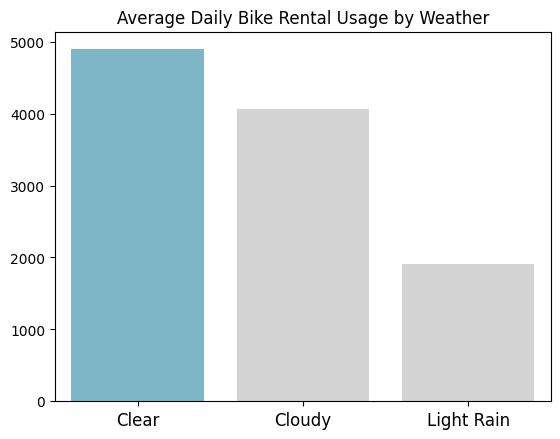

In [218]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="average daily usage",
    x="daily weather",
    data=daily_usage_by_weather.sort_values(by='average daily usage', ascending=False),
    palette=colors,
)
plt.title("Average Daily Bike Rental Usage by Weather")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\3954619763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\3954619763.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


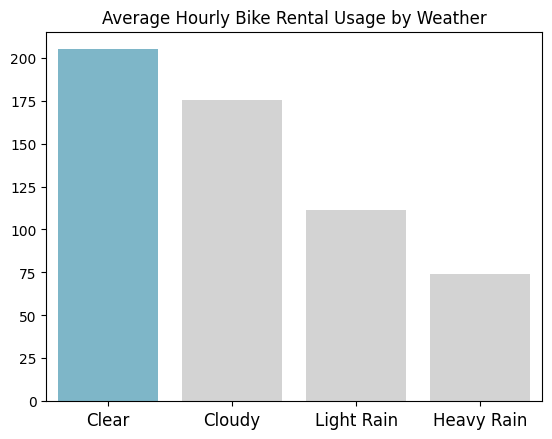

In [219]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="average hourly usage",
    x="hourly weather",
    data=hourly_usage_by_weather.sort_values(by='average hourly usage', ascending=False),
    palette=colors,
)
plt.title("Average Hourly Bike Rental Usage by Weather")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Which Season People Renting Bike The Most?

C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\2185113695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\2185113695.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


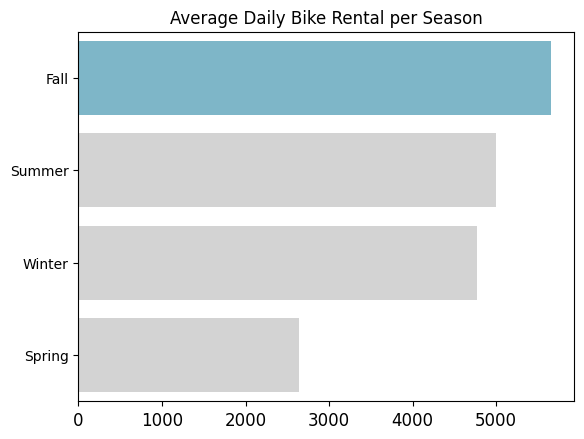

In [220]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="season",
    x="average usage",
    data=seasonly_usage.sort_values(by='average usage', ascending=False),
    palette=colors,
)
plt.title("Average Daily Bike Rental per Season")
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:

C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\627691000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\627691000.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\627691000.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\627691000.py:15: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\ryori\AppData\Local\Temp\ipykernel_36860\627691000.py:27: FutureWarning: 

Pas

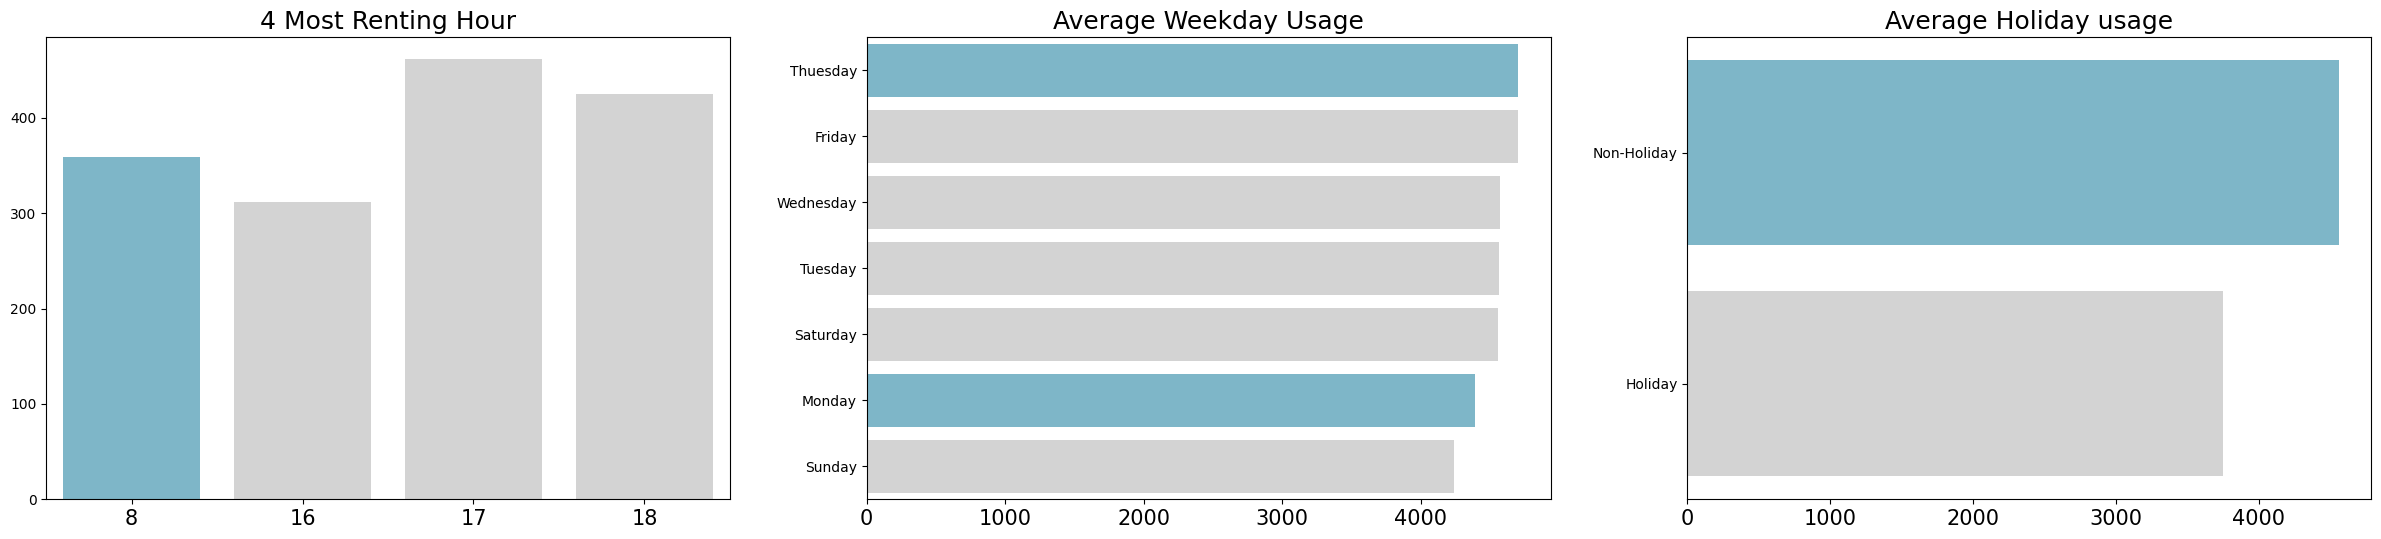

In [221]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="average usage",
    x="hour",
    data=hourly_usage.sort_values(by='average usage', ascending=False).head(4),
    palette=colors,
    ax = ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("4 Most Renting Hour", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(
    y="weekday",
    x="average usage",
    data=weekday_usage.sort_values(by='average usage', ascending=False),
    palette=colors,
    ax = ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Average Weekday Usage", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15)

sns.barplot(
    y="holiday",
    x="average usage",
    data=holiday_usage.sort_values(by='average usage', ascending=False),
    palette=colors,
    ax = ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Average Holiday usage", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15)


## Conclusion

- At which kind of weather condition Bike Sharing rentaling most bike daily and hourly ?  
A lot of people renting bike at sunny/clear day, it's same on hourly and daily  
- At which kind of season people renting bike the most ?  
People tend to rent bike at Fall and Summer and the number drop deeper in Spring  
- At which hour and kind of days people renting bike the most ?  
People tend to rent Bike at Hour 8, 16, 17, 18. which mean they tend to rent bike at evening and morning  
People tend to rent bike at Thursday and Friday  
People also tend to rent bike at non-holiday